## Assumptions & Setup
We treat the molecule as a 1D linear chain of atoms with alternating masses.

Carbon: 𝑀c = 12 amuM C = 12amu
Oxygen: 𝑀o = 16 amu

Bonds are ideal springs:

C=O spring constant: 𝑘CO≈1600N/mk 

C–C spring constant: 𝑘CC ≈ 1000N/m

We'll solve the eigenvalue problem 
𝐾𝑥⃗ =𝜔^2 𝑀𝑥⃗, where 𝐾 is the stiffness matrix and 𝑀 is the mass matrix.


Eigenfrequencies for C3O2:
Mode 1: ω = 0.0000 (arb. units)
Mode 2: ω = 5.3819 (arb. units)
Mode 3: ω = 11.6588 (arb. units)
Mode 4: ω = 16.9618 (arb. units)
Mode 5: ω = 18.6388 (arb. units)

Eigenfrequencies for C9O2:
Mode 1: ω = 0.0000 (arb. units)
Mode 2: ω = 2.4736 (arb. units)
Mode 3: ω = 5.0136 (arb. units)
Mode 4: ω = 7.5953 (arb. units)
Mode 5: ω = 10.1177 (arb. units)
Mode 6: ω = 12.4618 (arb. units)
Mode 7: ω = 14.5215 (arb. units)
Mode 8: ω = 16.2114 (arb. units)
Mode 9: ω = 17.4669 (arb. units)
Mode 10: ω = 18.2963 (arb. units)
Mode 11: ω = 18.4354 (arb. units)


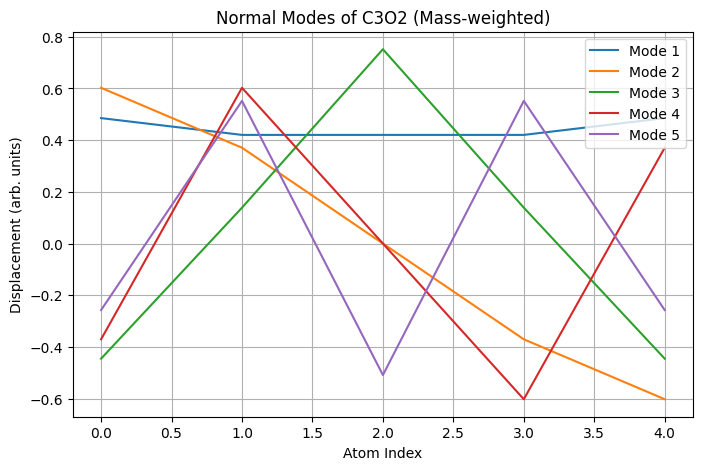

In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

def build_mass_matrix(masses):
    """Builds diagonal mass matrix M^{-1/2} for the eigenvalue problem."""
    return np.diag(1 / np.sqrt(masses))

def build_stiffness_matrix(k_list):
    """Builds the stiffness matrix K for a linear chain with N masses and N-1 springs."""
    N = len(k_list) + 1
    K = np.zeros((N, N))
    for i in range(N - 1):
        k = k_list[i]
        K[i, i] += k
        K[i + 1, i + 1] += k
        K[i, i + 1] -= k
        K[i + 1, i] -= k
    return K

def compute_normal_modes(masses, k_list):
    """Computes normal mode frequencies and eigenvectors for given masses and springs."""
    K = build_stiffness_matrix(k_list)
    M_inv_sqrt = build_mass_matrix(masses)
    D = M_inv_sqrt @ K @ M_inv_sqrt  # Mass-normalized stiffness matrix
    eigenvals, eigenvecs = eigh(D)
    freqs = np.sqrt(np.abs(eigenvals))  # ω = sqrt(λ)
    return freqs, eigenvecs

def print_modes(freqs, label):
    print(f"\nEigenfrequencies for {label}:")
    for i, f in enumerate(freqs):
        print(f"Mode {i+1}: ω = {f:.4f} (arb. units)")

# ---------- Problem 3A: C3O2 ----------
m_C = 12.0
m_O = 16.0
k_CO = 1600  # N/m (approx from CO2)
k_CC = 1000  # N/m (approx)

# Molecule layout: O–C–C–C–O
masses_C3O2 = [m_O, m_C, m_C, m_C, m_O]
springs_C3O2 = [k_CO, k_CC, k_CC, k_CO]

freqs_C3O2, modes_C3O2 = compute_normal_modes(masses_C3O2, springs_C3O2)
print_modes(freqs_C3O2, "C3O2")

# ---------- Problem 3B: C9O2 ----------
# Molecule layout: O–C–C–C–C–C–C–C–C–C–O
masses_C9O2 = [m_O] + [m_C]*9 + [m_O]
springs_C9O2 = [k_CO] + [k_CC]*8 + [k_CO]

freqs_C9O2, modes_C9O2 = compute_normal_modes(masses_C9O2, springs_C9O2)
print_modes(freqs_C9O2, "C9O2")

# Optional: Plot normal modes for C3O2
plt.figure(figsize=(8, 5))
for i in range(len(freqs_C3O2)):
    plt.plot(modes_C3O2[:, i], label=f'Mode {i+1}')
plt.title("Normal Modes of C3O2 (Mass-weighted)")
plt.xlabel("Atom Index")
plt.ylabel("Displacement (arb. units)")
plt.grid(True)
plt.legend()
plt.show()


Results:
Eigenfrequencies for C3O2:
Mode 1: ω = 0.0000 (arb. units)
Mode 2: ω = 5.3819 (arb. units)
Mode 3: ω = 11.6588 (arb. units)
Mode 4: ω = 16.9618 (arb. units)
Mode 5: ω = 18.6388 (arb. units)

Eigenfrequencies for C9O2:
Mode 1: ω = 0.0000 (arb. units)
Mode 2: ω = 2.4736 (arb. units)
Mode 3: ω = 5.0136 (arb. units)
Mode 4: ω = 7.5953 (arb. units)
Mode 5: ω = 10.1177 (arb. units)
Mode 6: ω = 12.4618 (arb. units)
Mode 7: ω = 14.5215 (arb. units)
Mode 8: ω = 16.2114 (arb. units)
Mode 9: ω = 17.4669 (arb. units)
Mode 10: ω = 18.2963 (arb. units)
Mode 11: ω = 18.4354 (arb. units)